### Learning Human-Like Tonal Inflections for Humanoid Robotics  
Audio Visuals for Sounds Produced by Humanoid Robot Mouth

## **Import Packages**

In [2]:
import numpy as np 
import matplotlib
import math
import os
from matplotlib import pyplot as plt
import matplotlib.cm as cm
from matplotlib import ticker
import IPython.display as ipd
import keras
import librosa
import librosa.display
#!pip install natsort
from natsort import os_sorted
#!pip install pydub
from pydub import AudioSegment

import warnings
warnings.filterwarnings('ignore')

## **Sound Representations for Human Voice and Robot Audio Files**

Human audio files sourced from Tone Perfect: [https://tone.lib.msu.edu/](https://tone.lib.msu.edu/)

In [3]:
# Define file paths
file_path1 = 'C:/Users/charl/OneDrive/Desktop/CMU Sem. 01/ML/Project/Tone Perfect/tone_perfect'
file_path2 = 'C:/Users/charl/OneDrive/Desktop/CMU Sem. 01/ML/Project/Tone Perfect/tone_robot_new/NewRobotLong'

# load human audio files
high_h, high_sr_h = librosa.core.load(file_path1 + '/ma1_FV1_MP3.mp3')
rise_h, rise_sr_h = librosa.core.load(file_path1 + '/ma2_FV1_MP3.mp3')
dip_h, dip_sr_h = librosa.core.load(file_path1 + '/ma3_FV1_MP3.mp3')
fall_h, fall_sr_h = librosa.core.load(file_path1 + '/ma4_FV1_MP3.mp3')


In [8]:
""" 
1. Load files with PyDub (_h indicates human voice audio file, _r indicates robot audio file)
2. Cut mic noise from first 0.05s
3. Increase volume
4. Add fade in/fade out
5. Export as .wav files
6. Load files with librosa 
"""
# High-level Tone
high_r_loud = AudioSegment.from_wav(file_path2 + '/MouthRobot1.wav')
high_r_loud = high_r_loud[50:] # cut mic noise in first 0.05s
high_r_loud += 15 # increase volume (dB)
high_r_loud_fade = high_r_loud.fade_in(250).fade_out(250) # 0.25s fade in and fade out
high_r_loud_fade.export('MouthRobot1_loud_fade.wav', 'wav')
high_r, high_sr_r = librosa.core.load('MouthRobot1_loud_fade.wav')

# Rising Tone
rise_r_loud = AudioSegment.from_wav(file_path2 + '/MouthRobot290.wav')
rise_r_loud = rise_r_loud[50:] # cut mic noise in first 0.05s
rise_r_loud += 15 # increase volume (dB)
rise_r_loud_fade = rise_r_loud.fade_in(250).fade_out(250) # 0.25s fade in and fade out
rise_r_loud_fade.export('MouthRobot290_loud_fade.wav', 'wav')
rise_r, rise_sr_r = librosa.core.load('MouthRobot290_loud_fade.wav')

# Dipping Tone 
dip_r_loud = AudioSegment.from_wav(file_path2 + '/MouthRobot570.wav')
dip_r_loud = dip_r_loud[50:] # cut mic noise in first 0.05s
dip_r_loud += 15 # increase volume (dB)
dip_r_loud_fade = dip_r_loud.fade_in(250).fade_out(250) # 0.25s fade in and fade out
dip_r_loud_fade.export('MouthRobot570_loud_fade.wav', 'wav')
dip_r, dip_sr_r = librosa.core.load('MouthRobot570_loud_fade.wav')

# Falling Tone
fall_r_loud = AudioSegment.from_wav(file_path2 + '/MouthRobot890.wav')
fall_r_loud = fall_r_loud[50:] # cut mic noise in first 0.05s
fall_r_loud += 15 # increase volume (dB)
fall_r_loud_fade = fall_r_loud.fade_in(250).fade_out(250) # 0.25s fade in and fade out
fall_r_loud.export('MouthRobot890_loud_fade.wav', 'wav')
fall_r, fall_sr_r = librosa.core.load('MouthRobot890_loud_fade.wav')

#### Visualization 1: Wave Plots

High Level Tone, Female Voice 1


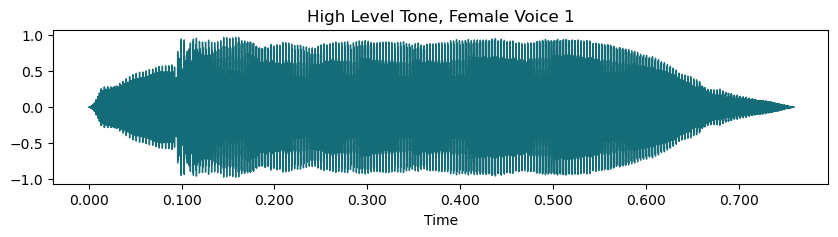

In [112]:
plt.figure(figsize=(10, 2))
plt.title('High Level Tone, Female Voice 1')
librosa.display.waveshow(high_h, sr=high_sr_h, color='#146C78')
print('High Level Tone, Female Voice 1')
ipd.Audio(data = high_h, rate = high_sr_h)

High Level Tone, Robot (Raw):


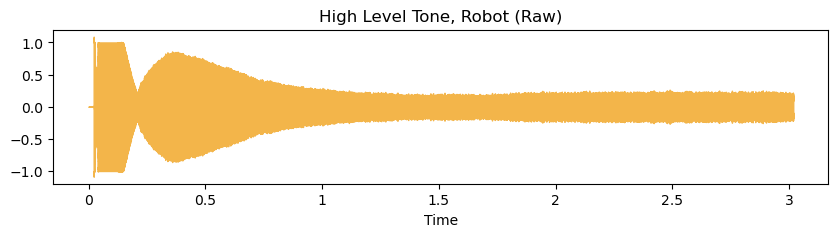

In [7]:
high_raw, high_sr_raw = librosa.core.load(file_path2 + '/MouthRobot1.wav')
plt.figure(figsize=(10, 2))
plt.title('High Level Tone, Robot (Raw)')
librosa.display.waveshow(high_raw, sr=high_sr_raw, color='#f3b54a')
print('High Level Tone, Robot (Raw):')
ipd.Audio(data = high_raw, rate = high_sr_raw)

High Level Tone, Robot (Compressed, Pitch Shifted, and Fade In/Fade Out):


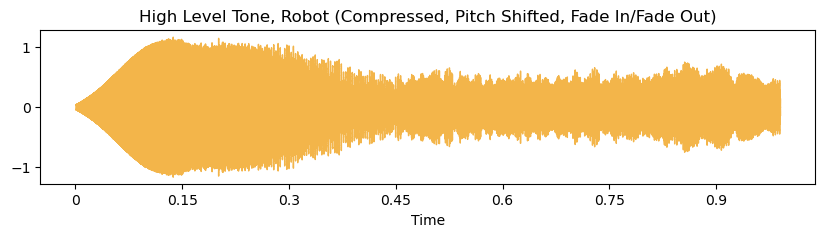

In [9]:
high_r_compress = high_r[::3]
high_r_compress = librosa.effects.pitch_shift(high_r_compress, sr=high_sr_r, n_steps = -20, bins_per_octave=12)
plt.figure(figsize=(10, 2))
plt.title('High Level Tone, Robot (Compressed, Pitch Shifted, Fade In/Fade Out)')
librosa.display.waveshow(high_r_compress, sr=high_sr_r, color='#f3b54a')
print('High Level Tone, Robot (Compressed, Pitch Shifted, and Fade In/Fade Out):')
ipd.Audio(data = high_r_compress, rate = high_sr_r)

Rising Tone, Female Voice 1


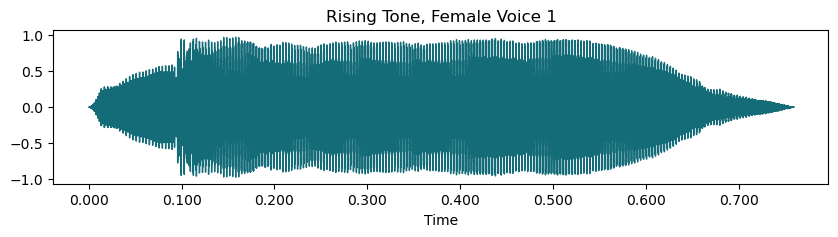

In [102]:
plt.figure(figsize=(10, 2))
plt.title('Rising Tone, Female Voice 1')
librosa.display.waveshow(high_h, sr=high_sr_h, color='#146C78')
print('Rising Tone, Female Voice 1')
ipd.Audio(data = rise_h, rate = rise_sr_h)

Rising Tone, Robot (Compressed, Pitch Shifted, Fade In/Fade Out):


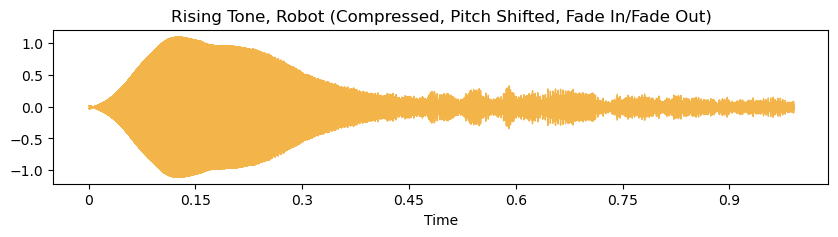

In [114]:
rise_r_compress = rise_r[::3]
rise_r_compress = librosa.effects.pitch_shift(rise_r_compress, sr=rise_sr_r, n_steps = -20, bins_per_octave=12)
plt.figure(figsize=(10, 2))
plt.title('Rising Tone, Robot (Compressed, Pitch Shifted, Fade In/Fade Out)')
librosa.display.waveshow(rise_r_compress, sr=rise_sr_r, color='#f3b54a')
print('Rising Tone, Robot (Compressed, Pitch Shifted, Fade In/Fade Out):')
ipd.Audio(data = rise_r_compress, rate = rise_sr_r)

Dipping Tone, Female Voice 1


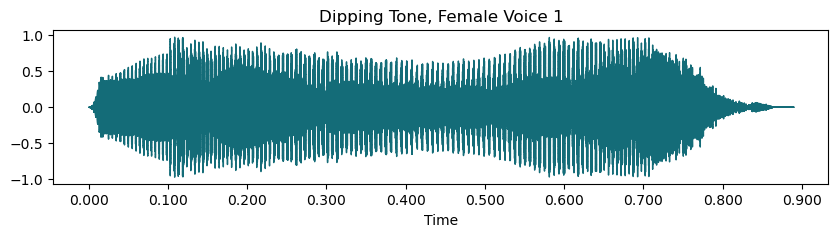

In [36]:
plt.figure(figsize=(10, 2))
plt.title('Dipping Tone, Female Voice 1')
librosa.display.waveshow(dip_h, sr=dip_sr_h, color='#146C78')
print('Dipping Tone, Female Voice 1')
ipd.Audio(data = dip_h, rate = dip_sr_h)

Dipping Tone, Robot (Compressed, Pitch Shifted, Fade In/Fade Out):


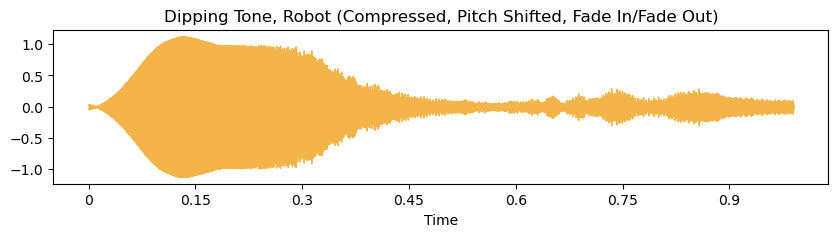

In [115]:
dip_r_compress = dip_r[::3]
dip_r_compress = librosa.effects.pitch_shift(dip_r_compress, sr=dip_sr_r, n_steps = -20, bins_per_octave=12)
plt.figure(figsize=(10, 2))
plt.title('Dipping Tone, Robot (Compressed, Pitch Shifted, Fade In/Fade Out)')
librosa.display.waveshow(dip_r_compress, sr=dip_sr_r, color='#f3b54a')
print('Dipping Tone, Robot (Compressed, Pitch Shifted, Fade In/Fade Out):')
ipd.Audio(data = dip_r_compress, rate = dip_sr_r)

Falling Tone, Female Voice 1


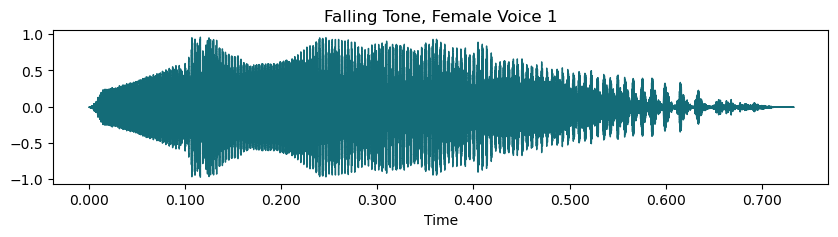

In [103]:
plt.figure(figsize=(10, 2))
plt.title('Falling Tone, Female Voice 1')
librosa.display.waveshow(fall_h, sr=fall_sr_h, color='#146C78')
print('Falling Tone, Female Voice 1')
ipd.Audio(data = fall_h, rate = fall_sr_h)

Falling Tone, Robot (Compressed, Pitch Shifted, Fade In/Fade Out):


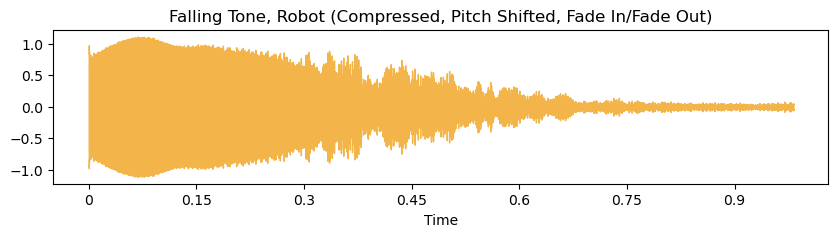

In [116]:
fall_r_compress = fall_r[::3]
fall_r_compress = librosa.effects.pitch_shift(fall_r_compress, sr=dip_sr_r, n_steps = -20, bins_per_octave=12)
plt.figure(figsize=(10, 2))
plt.title('Falling Tone, Robot (Compressed, Pitch Shifted, Fade In/Fade Out)')
librosa.display.waveshow(fall_r_compress, sr=fall_sr_r, color='#f3b54a')
print('Falling Tone, Robot (Compressed, Pitch Shifted, Fade In/Fade Out):')
ipd.Audio(data = fall_r_compress, rate = fall_sr_r)

#### Visualization 2: Spectograms

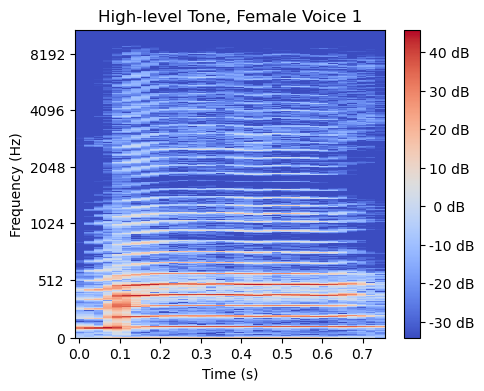

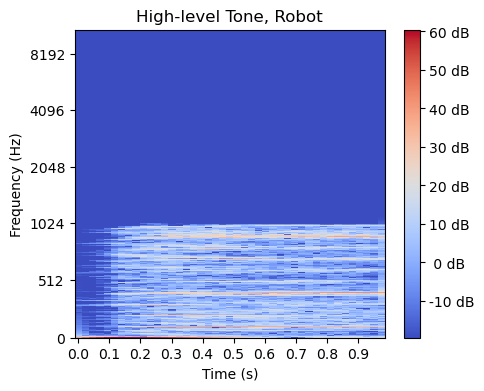

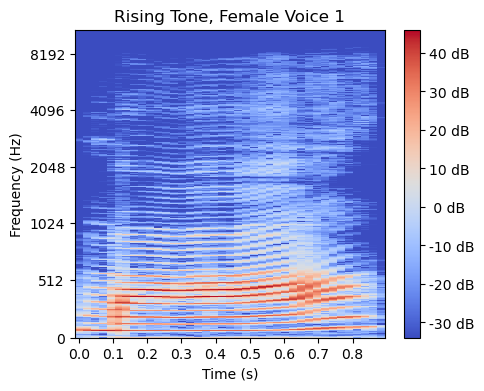

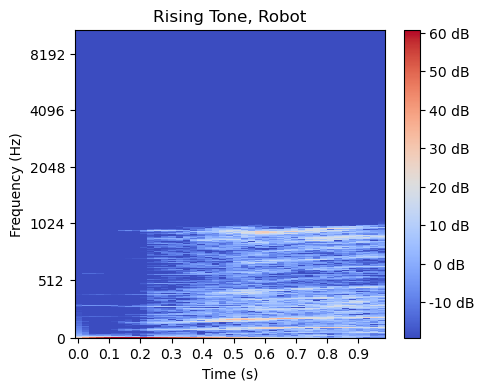

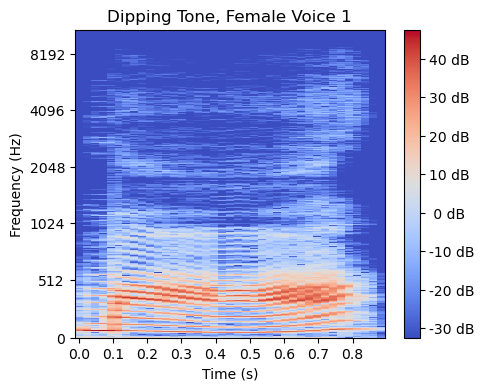

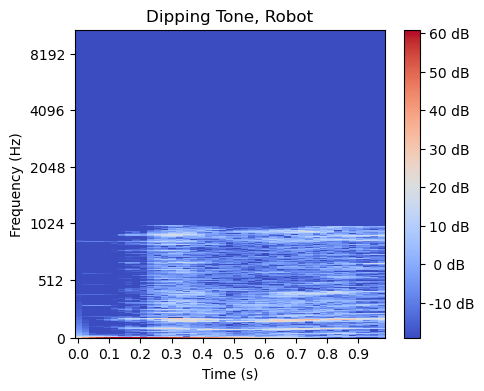

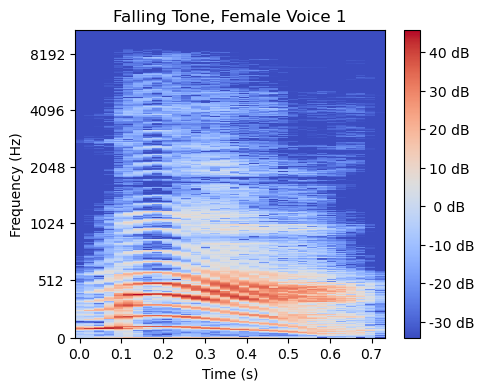

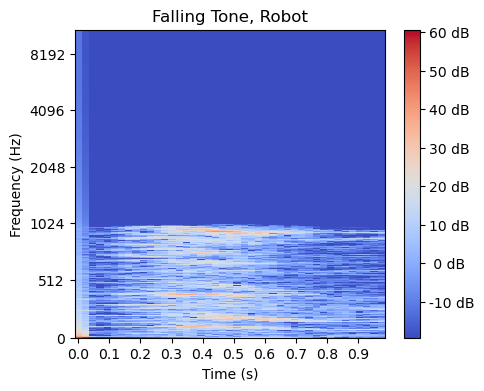

In [117]:
figsize_x = 5
figsize_y = 4

# High-level Tone
audio = [high_h, high_r_compress, rise_h, rise_r_compress, dip_h, dip_r_compress, fall_h, fall_r_compress]
i=0
for tone in audio:
    fig, ax = plt.subplots(figsize=(figsize_x, figsize_y))
    X = librosa.stft(tone)
    Xdb = librosa.amplitude_to_db(abs(X))
    img = librosa.display.specshow(Xdb, y_axis='mel', x_axis='time') #don't know if the mel here is correct
    
    if i==0:
        ax.set(title='High-level Tone, Female Voice 1')
    elif i==1:
        ax.set(title='High-level Tone, Robot')
    elif i==2:
        ax.set(title='Rising Tone, Female Voice 1')
    elif i==3:
        ax.set(title='Rising Tone, Robot')
    elif i==4:
        ax.set(title='Dipping Tone, Female Voice 1')
    elif i==5:
        ax.set(title='Dipping Tone, Robot')
    elif i==6:
        ax.set(title='Falling Tone, Female Voice 1')
    else:
        ax.set(title='Falling Tone, Robot')

    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.1f}"))
    fig.gca().set_xlabel("Time (s)")
    fig.gca().set_ylabel("Frequency (Hz)")
    fig.colorbar(img, ax=ax, format="%2.f dB")
    i+=1



#### Visualization 3: Mel-Spectograms

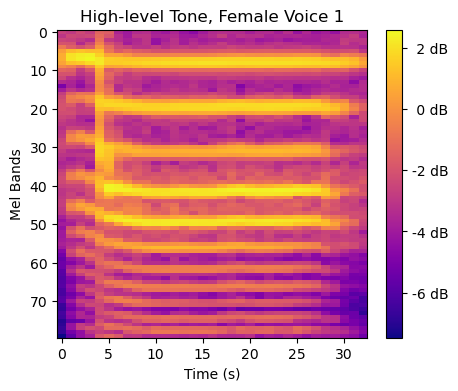

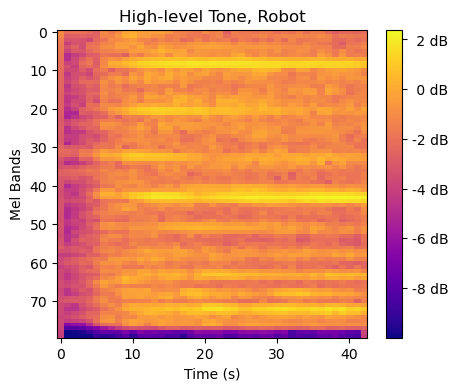

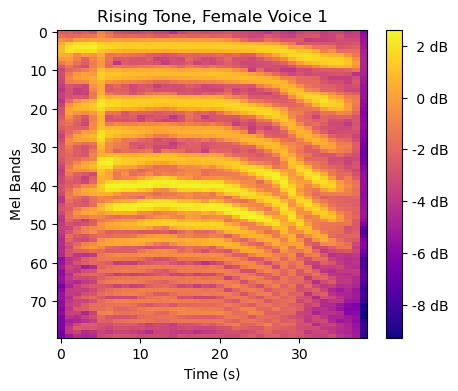

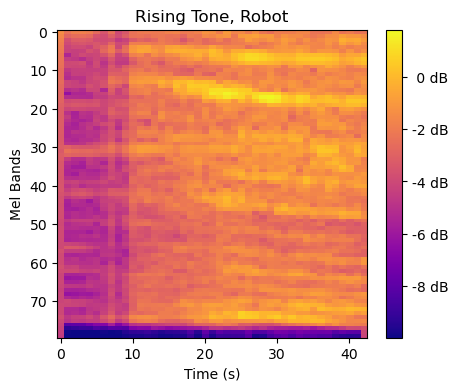

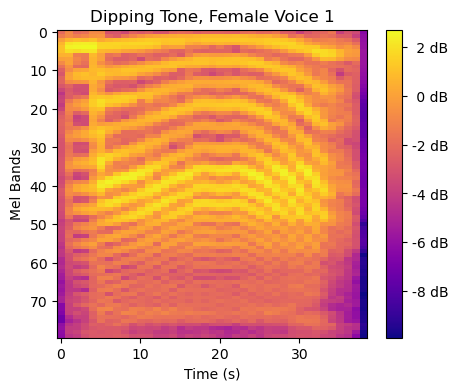

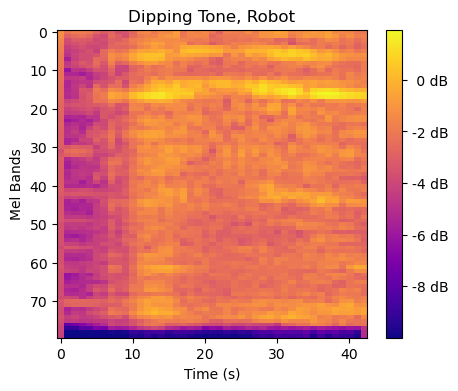

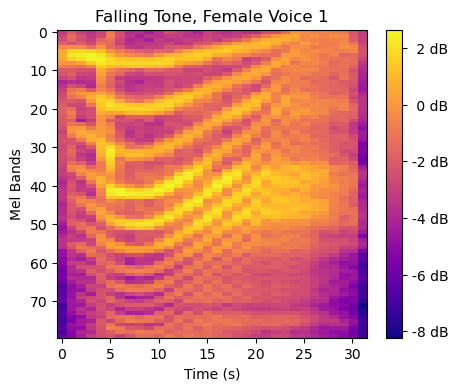

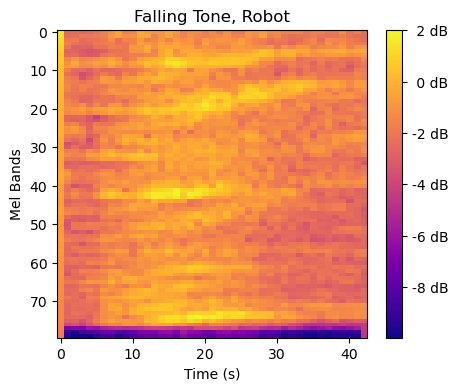

In [118]:
import matplotlib.cm as cm

sr = [high_sr_h, high_sr_r, rise_sr_h, rise_sr_r, dip_sr_h, dip_sr_r, fall_sr_h, fall_sr_r]

i=0
for i in range(0, len(audio)):
    plt.figure(figsize=(figsize_x, figsize_y))
    mel1 = librosa.feature.melspectrogram(audio[i], sr=sr[i], n_fft=1024, hop_length=512, n_mels=80, fmin=75, fmax=3700)
    plt.imshow(np.log10(mel1 + 1e-10), aspect='auto', cmap=cm.plasma)
    
    if i==0:
        plt.title('High-level Tone, Female Voice 1')
    elif i==1:
        plt.title('High-level Tone, Robot')
    elif i==2:
        plt.title('Rising Tone, Female Voice 1')
    elif i==3:
        plt.title('Rising Tone, Robot')
    elif i==4:
        plt.title('Dipping Tone, Female Voice 1')
    elif i==5:
        plt.title('Dipping Tone, Robot')
    elif i==6:
        plt.title('Falling Tone, Female Voice 1')
    else:
        plt.title('Falling Tone, Robot')
        
    plt.xlabel('Time (s)')
    plt.ylabel('Mel Bands')
    plt.colorbar(format="%2.f dB")
    plt.show()
    i+=1


#### Visualization 4: Mel Frequency Cepstrum Coefficients (MFCC)

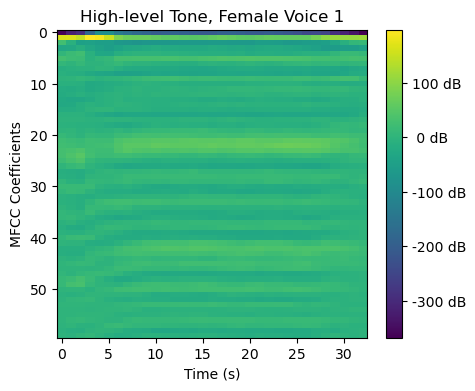

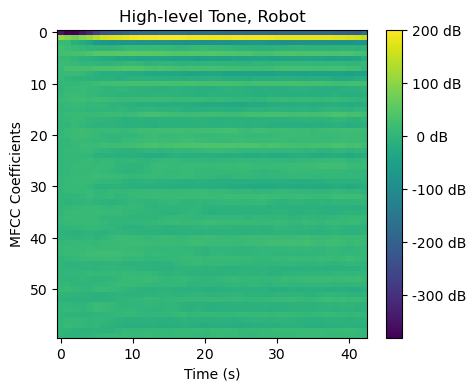

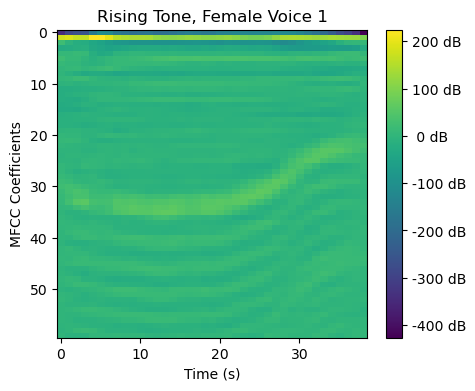

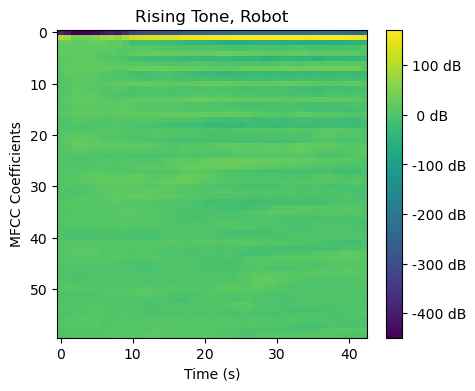

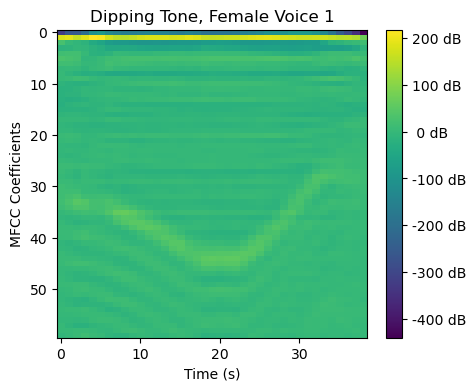

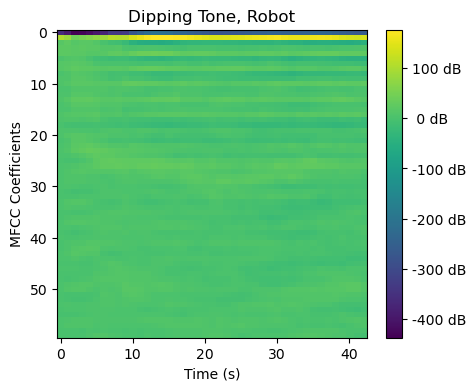

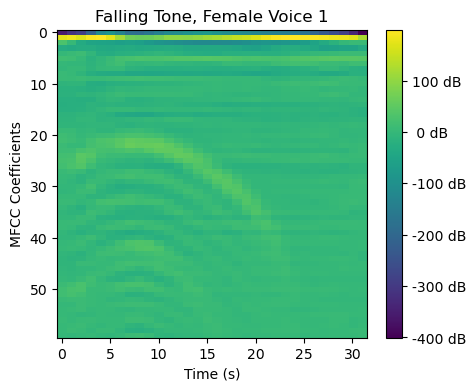

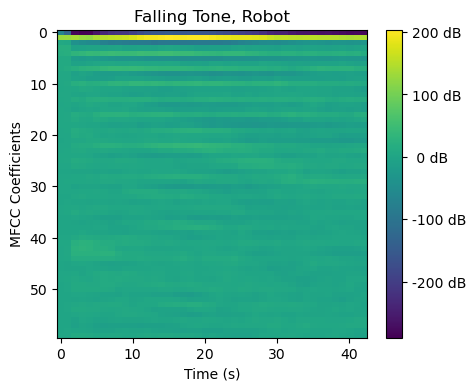

In [119]:
i=0
for i in range(0, len(audio)):
    plt.figure(figsize=(figsize_x, figsize_y))
    mfcc = librosa.feature.mfcc(y=audio[i], sr=sr[i], n_mfcc=60)
    plt.imshow(mfcc, aspect='auto', cmap=cm.viridis)
    
    if i==0:
        plt.title('High-level Tone, Female Voice 1')
    elif i==1:
        plt.title('High-level Tone, Robot')
    elif i==2:
        plt.title('Rising Tone, Female Voice 1')
    elif i==3:
        plt.title('Rising Tone, Robot')
    elif i==4:
        plt.title('Dipping Tone, Female Voice 1')
    elif i==5:
        plt.title('Dipping Tone, Robot')
    elif i==6:
        plt.title('Falling Tone, Female Voice 1')
    else:
        plt.title('Falling Tone, Robot')
    
    plt.xlabel('Time (s)')
    plt.ylabel('MFCC Coefficients') #Maybe kHz but I don't think so
    plt.colorbar(format="%2.f dB")
    plt.show()